# Analyzing Marketing Campaigns with Pandas

As as a data scientist for a Marketing company, you will have to translate common business questions into measurable outcomes, including "How did this campaign perform?", "Which channel is referring the most subscribers?", "Why is a particular channel underperforming?" and more using a fake marketing dataset based on the data of an online subscription business. This exercise will build on Python and pandas fundamentals, such as merging/slicing datasets, groupby(), correcting data types and visualizing results using matplotlib.

#Pandas

In this section, you will review pandas basics including importing datasets, exploratory analysis, and basic plotting.

*   Import pandas into your environment with the alias pd.
*   Import the 'marketing.csv' dataset.

In [1]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv
marketing = pd.read_csv('../Datasets/marketing.csv')

#Examining the data
Now that you've imported the data, you will examine it to ensure it is valid. While it may be tempting to dive into analysis, by validating your dataset immediately, you ensure that the insights you derive are both true and actionable. Ensuring the validity of your dataset should always be the first step you take when beginning analysis on a new dataset.

The marketing DataFrame is available in your workspace.

*   Print the first five rows of the marketing DataFrame.




In [2]:
# Print the first five rows
print(marketing.iloc[0:5])

# Print the statistics of all columns
print(marketing.describe())

# Check column data types and non-missing values
print(marketing.info())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

#Updating the data type of a column
You will often want to modify the data type of columns to suit your needs. Pandas and Python have special functionalities around manipulating data types that can make your analysis easier and more robust, such as concatenating strings and summing boolean values. However, this functionality is only possible if columns are stored as the intended data type.

In this exercise, you will modify the data type of the is_retained column.

In [3]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
#Hint: Remember, you can use the argument 'bool' to change the data type to boolean. Checkc the function astype()
marketing['is_retained'] = marketing['is_retained'].astype(bool)

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

object
bool


#Adding new columns
Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.

In this exercise, you will add two columns to marketing:

channel_code: represents the numeric value of the subscribing channel
is_correct_lang: conveys whether the ad was shown to the user in their preferred language

*   Add a new column, channel_code, which maps the values in the subscribing_channel column to a numeric scale using the channel_dict dictionary.

In [4]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2,
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
# Hint: check the use of the map function
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)



*  is_correct_lang: conveys whether the ad was shown to the user in their preferred language

* Import numpy with the alias np.
*  Add a new column, is_correct_lang, which is 'Yes' if the user was shown the ad in their preferred language, 'No' otherwise. You can use the columns 'language_preferred' and 'language_displayed'.
*  use the np.where() function; this function takes 3 parameters: the test, the first value, the second value. In this case of a boolean test the second and third value are "Yes" and "No"

In [5]:
# Import numpy
import numpy as np
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'],
    'Yes',   # Value if the condition is True
    'No'     # Value if the condition is False
)

#Date columns
Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.

In this exercise, you will practice reading the CSV with proper date columns and create a day of the week column.


Read the CSV File with parse_dates
* You can read the CSV file and specify which column should be parsed as dates:

In [6]:
# Import marketing.csv with date columns
marketing = pd.read_csv("../Datasets/marketing.csv", parse_dates = ['date_served', 'date_subscribed'])

/tmp/ipykernel_242677/3768402342.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv("../Datasets/marketing.csv", parse_dates = ['date_served', 'date_subscribed'])
/tmp/ipykernel_242677/3768402342.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv("../Datasets/marketing.csv", parse_dates = ['date_served', 'date_subscribed'])



*   Create a day of week column from 'date_subscribed' using .dt.dayofweek.

Hint: Pandas has a function that .to_datetime() that convert objects to date format.

## Convert to Datetime
Use pd.to_datetime() to convert the date_subscribed column to datetime

## Access Date Elements
Once the column is converted, you can access various components of the date in the **dt** object:
*  Access year
pd.to_datetime(df['date_subscribed']).dt.year
*  Access month
.....dt.month

*   Access day
.....dt.day

*   Access weekday (0=Monday, 6=Sunday)
.....dt.weekday

*   Access day of the week name
....dt.day_name()

In [9]:
# Add a DoW column
marketing['DoW'] = pd.to_datetime(marketing['date_subscribed']).dt.weekday
print(marketing['DoW'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    2.0
10035    2.0
10036    2.0
Name: DoW, Length: 10037, dtype: float64


# EDA

In Python, particularly with the Pandas library, the .nunique() method is used to count the number of unique values in a Series or DataFrame. This is particularly useful for exploring and understanding the distinct values in your data.

The .groupby() method in Python's Pandas library is a powerful tool used for splitting a DataFrame into groups based on some criteria. It allows you to perform operations on these groups, such as aggregating, transforming, or filtering data.

Key Features of .groupby()
* Splitting: The data is divided into groups based on the values of one or more columns (also called "keys").

Applying: You can apply functions to the resulting groups. Common functions include:

* Aggregation (e.g., sum, mean, count)
* Transformation (e.g., standardization)
* Filtering (e.g., retaining groups based on specific conditions)
* Combining: After applying a function, the results are combined back into a DataFrame or Series.

Basic Syntax:
grouped = df.groupby('column_name')

# Daily marketing reach by channel
In this exercise, you'll determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

You'll use .groupby() and .nunique() to calculate daily users.

* Group the marketing DataFrame by 'date_served' and count the number of unique user IDs present in the user_id column.

Hint: Make sure 'date_served' is enclosed in brackets [] within your call to .groupby()

In [12]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


# Visualizing daily marketing reach
In the previous exercise, you created a daily_users DataFrame, which contained the number of users who subscribed each day. While this was a great first step, it is challenging to interpret daily trends by looking at a table. To make it easier for you and your business stakeholders to notice subscriber trends, you will visualize your results using a line plot.

* Use the .plot() method to visualize the results of date_served.
* Add the title 'Daily users' and the y-axis label 'Number of users'.
* Rotate the x-axis labels by 45 degrees.
* Display the plot.

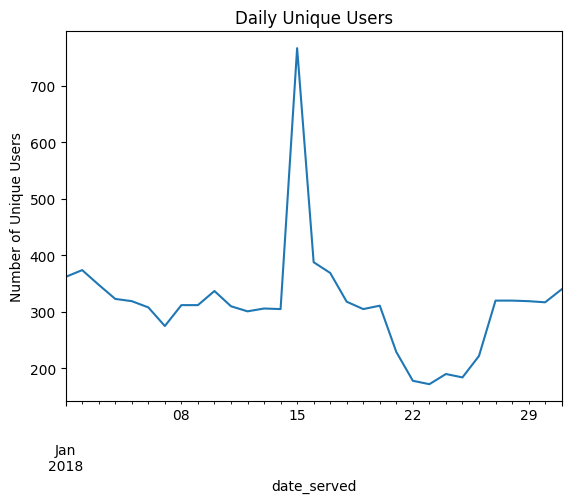

In [15]:
# Plot daily_users
from matplotlib import pyplot as plt

daily_users.plot()

# Include a title and y-axis label
plt.title('Daily Unique Users')
plt.ylabel('Number of Unique Users')

# Rotate the x-axis labels by 45 degrees
#plt.xticks(rotation=45)

# Display the plot
plt.show()
